In [1]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = r'\usepackage{libertine}' 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

In [2]:
masterdata = pd.read_csv("../experiments/2019-03-29-10-39_BanditStaticOptimistic_/BanditStaticOptimistic.csv")
narms = masterdata.iloc[0]['k']

In [3]:
masterdata.tail(20)

,bandit,optimistic,dataset,scalingstrategy,k,gain,cputime,iteration
3999980,MP-TS-ADWIN-0.1,True,StaticGenerator-100,KL-1-100-0.9,20.08,18.01,1.5942,99980
3999981,MP-TS-ADWIN-0.1,True,StaticGenerator-100,KL-1-100-0.9,20.32,18.22,1.4967,99981
3999982,MP-TS-ADWIN-0.1,True,StaticGenerator-100,KL-1-100-0.9,20.14,18.20,1.6336,99982
3999983,MP-TS-ADWIN-0.1,True,StaticGenerator-100,KL-1-100-0.9,20.22,18.29,1.4948,99983
3999984,MP-TS-ADWIN-0.1,True,StaticGenerator-100,KL-1-100-0.9,20.24,18.35,1.5460,99984
3999985,MP-TS-ADWIN-0.1,True,StaticGenerator-100,KL-1-100-0.9,20.32,18.47,1.5277,99985
3999986,MP-TS-ADWIN-0.1,True,StaticGenerator-100,KL-1-100-0.9,20.22,18.15,1.5165,99986
3999987,MP-TS-ADWIN-0.1,True,StaticGenerator-100,KL-1-100-0.9,20.38,18.12,1.5370,99987
3999988,MP-TS-ADWIN-0.1,True,StaticGenerator-100,KL-1-100-0.9,20.22,18.06,1.7466,99988
3999989,MP-TS-ADWIN-0.1,True,StaticGenerator-100,KL-1-100-0.9,20.26,18.26,1.5170,99989


In [4]:
sorted(masterdata.bandit.unique())

['CUCB',
 'CUCBm',
 'Exp3.M',
 'IMP-TS',
 'MP-KLUCB',
 'MP-KLUCBPLUS',
 'MP-OTS',
 'MP-TS',
 'MP-TS-ADWIN-0.1',
 'OS']

In [5]:
masterdata['reward/arm'] = masterdata['gain']/masterdata['k']

In [7]:
masterdata["optimistic"].unique()

array([False,  True], dtype=bool)

In [8]:
masterdata.groupby(["bandit", "scalingstrategy"])[['gain', 'k', 'reward/arm']].mean()

gain          k  reward/arm
bandit          scalingstrategy                                  
CUCB            KL-1-100-0.7     42.017996  59.899900    0.701490
                KL-1-100-0.9     17.696582  19.647764    0.901138
CUCBm           KL-1-100-0.7     42.073304  59.974606    0.701539
                KL-1-100-0.9     17.961217  19.935811    0.901399
Exp3.M          KL-1-100-0.7     14.226888  20.504462    0.610245
                KL-1-100-0.9      1.512998   2.102542    0.601065
IMP-TS          KL-1-100-0.7     42.088287  59.994446    0.701557
                KL-1-100-0.9     18.044456  20.029194    0.901353
MP-KLUCB        KL-1-100-0.7     42.076511  59.979318    0.701537
                KL-1-100-0.9     17.997844  19.975968    0.901420
MP-KLUCBPLUS    KL-1-100-0.7     42.088516  59.994531    0.701559
                KL-1-100-0.9     18.037872  20.020626    0.901409
MP-OTS          KL-1-100-0.7     42.088735  59.994657    0.701562
                KL-1-100-0.9     18.045904  20.030582    0.901365
MP-TS           KL-1-100-0.7     42.087264  59.992655    0.701561
                KL-1-100-0.9     18.039591  20.023220    0.901384
MP-TS-ADWIN-0.1 KL-1-100-0.7     41.919632  59.841747    0.700530
                KL-1-100-0.9     18.027995  20.091259    0.897750
OS              KL-1-100-0.7     42.298367  60.500910    0.699155
                KL-1-100-0.9     18.447577  20.529025    0.899049

In [9]:
masterdata.describe()

,k,gain,cputime,iteration,reward/arm
count,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06
mean,3.715316e+01,2.783888e+01,3.669132e-01,4.999950e+04,7.814033e-01
std,2.176466e+01,1.392513e+01,4.061537e-01,2.886752e+04,1.166333e-01
min,1.010000e+00,3.500000e-01,5.700000e-03,0.000000e+00,3.302752e-01
25%,1.998000e+01,1.796000e+01,1.562000e-01,2.499975e+04,6.995000e-01
50%,2.023000e+01,1.834000e+01,1.992000e-01,4.999950e+04,7.086391e-01
75%,5.999000e+01,4.203000e+01,2.548000e-01,7.499925e+04,9.000000e-01
max,1.000000e+02,5.068000e+01,6.739200e+00,9.999900e+04,9.305136e-01


In [10]:
masterdata['dataset'].unique()

array(['StaticGenerator-100'], dtype=object)

In [11]:
husl4 = sns.color_palette("husl", 4)
husl5 = sns.color_palette("husl", 5)
husl6 = sns.color_palette("husl", 7)
greens5 = sns.color_palette("Greens_r", 5)
purples5 = sns.color_palette("Purples_r", 5)
blues5 = sns.color_palette("Blues_r", 5)
reds5 = sns.color_palette("Reds_r", 5)
oranges5 = sns.color_palette("Oranges_r", 5)
greys5 = sns.color_palette("Greys_r", 5)

In [12]:
styledictionary = {
    
    'MP-TS': {'marker': 'o', 'color': reds5[0], 'linestyle': "-"},
    'MP-TS-ADWIN-0.1': {'marker': 'o', 'color': reds5[0], 'linestyle': ":"},
    'MP-KLUCB': {'marker': '^', 'color': blues5[0], 'linestyle': "-"},
    'Exp3.M' : {'marker': 's', 'color': purples5[0], 'linestyle': "-"},
    'CUCB': {'marker': 'D', 'color': greens5[0], 'linestyle': "-"},
    'OR': {'marker': '', 'color': husl5[2], 'linestyle': "-"},
    'OS': {'marker': '', 'color': oranges5[0], 'linestyle': "-"},
    'OR': {'marker': '', 'color': "black", 'linestyle': "-"},
    'OD': {'marker': '', 'color': "red", 'linestyle': "-"},
}

In [13]:
masterdata["scalingstrategy"].unique()

array(['KL-1-100-0.7', 'KL-1-100-0.9'], dtype=object)

In [14]:
delta = 0.9
scalingstrategy  = 'KL-1-100-%s'%delta
data = masterdata.loc[masterdata["scalingstrategy"] == scalingstrategy]

In [15]:
data.columns

Index(['bandit', 'optimistic', 'dataset', 'scalingstrategy', 'k', 'gain',
       'cputime', 'iteration', 'reward/arm'],
      dtype='object')

In [16]:
data.groupby("bandit")["reward/arm"].describe()

,count,mean,std,min,25%,50%,75%,max
bandit,,,,,,,,
CUCB,200000.0,0.901138,0.009486,0.496429,0.896839,0.901359,0.905804,0.929045
CUCBm,200000.0,0.901399,0.009420,0.496429,0.897192,0.901615,0.906030,0.930514
Exp3.M,200000.0,0.601065,0.126611,0.330275,0.517544,0.564815,0.637097,0.930077
IMP-TS,200000.0,0.901353,0.009426,0.496939,0.897051,0.901500,0.906000,0.927856
MP-KLUCB,200000.0,0.901420,0.009413,0.496429,0.897192,0.901656,0.905983,0.929789
MP-KLUCBPLUS,200000.0,0.901409,0.009415,0.496429,0.897051,0.901500,0.906000,0.930326
MP-OTS,200000.0,0.901365,0.009446,0.496939,0.897000,0.901500,0.906000,0.928929
MP-TS,200000.0,0.901384,0.009486,0.503100,0.897000,0.901500,0.906000,0.927964
MP-TS-ADWIN-0.1,200000.0,0.897750,0.009484,0.502143,0.893447,0.897959,0.902439,0.925926


In [17]:
prettynames = {
    "CUCB": "S-CUCB",
    "CUCBm": "S-CUCBm",
    "Exp3.M": "S-Exp3.M",
    "MP-KLUCB": "S-KL-UCB",
    "MP-KLUCBPLUS": "S-KL-UCB+",
    "IMP-TS": "S-ITS",
    "MP-OTS": "S-OTS",
    "MP-TS": "S-TS",
    "MP-TS-ADWIN-0.1": "S-TS-ADWIN",
    "OD": "S-DO",
    "OR": "S-RO",
    "OS": "S-SO"
}

selectedbandits =  ["CUCB", "Exp3.M", "MP-KLUCB", "MP-TS", "MP-TS-ADWIN-0.1", "OD", "OR", "OS"]

In [18]:
pullref = np.full(100000,20)

In [19]:
#expected_gains = np.linspace(0.995,0.5,9901) #expected_gains = np.linspace(0.9975,0.5025,9901)
expected_gains = np.linspace(0.9966666666666667,0.5016666666666666,9901)

In [20]:
masterdata["bandit"].unique()

array(['MP-OTS', 'MP-KLUCB', 'CUCBm', 'OS', 'CUCB', 'MP-KLUCBPLUS',
       'IMP-TS', 'MP-TS', 'MP-TS-ADWIN-0.1', 'Exp3.M'], dtype=object)

In [21]:
selected_bandits = ['CUCB', 'MP-TS', 'MP-KLUCB', 'Exp3.M']

<IPython.core.display.Javascript object>


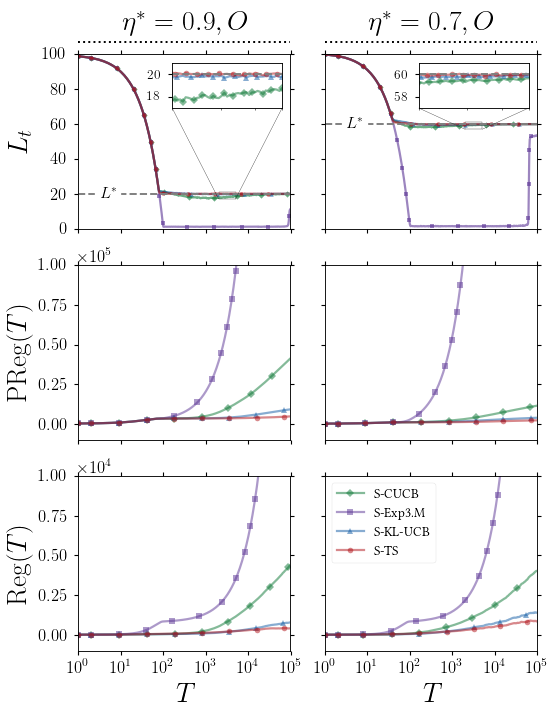

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [33]:
%matplotlib notebook

fig, axes = plt.subplots(3, 2, sharey='row', sharex=True, figsize=(7,9))
axees = axes.flatten()

scalingstrategies = ['KL-1-100-0.9', 'KL-1-100-0.7']
targets = [20,60]
netas = [0.9,0.7]
pullrefs = [np.full(100000,20), np.full(100000,60)]

# top plots
offset = 0

for j,scalingstrategy in enumerate(scalingstrategies):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    subdata = subdata[subdata["optimistic"]]
    data_grouped = subdata[subdata["scalingstrategy"] == scalingstrategy].groupby("bandit")
    
    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        df = df.sort_values("iteration").reset_index()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        df = df.iloc[[0] + list(indices)]
        name = df['bandit'][0]
        if(name in ["OD", "OR"]):
            pass
        else:
            lw = 2
            df['k'].plot(label=prettynames[name], linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.6, markersize=4,# logx=True,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    plt.axhline(y=targets[j], linestyle="--", c="grey")
    plt.text(5, targets[j], "$L^*$", fontsize=15, va='center', ha='center', backgroundcolor='w')
    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel("$L_t$")
        
    plt.ylim((0,100))
    plt.title(r'$\eta^* = %s, O$'%(netas[j]), y=1.1)
    plt.axhline(y=107, c="black", linestyle=":", clip_on=False)

    ax = plt.gca()
    from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
    axins = zoomed_inset_axes(ax, 6.5, loc=1)

    for i,df in data_grouped:
        df = df.sort_values("iteration").reset_index()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        df = df.iloc[[0] + list(indices)]
        name = df['bandit'][0]
        if(name in ["OD", "OR"]):
            pass
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                df['k'].plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                df['k'].plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    x1, x2, y1, y2 = 2000, 5000, targets[j]-3, targets[j]+1 # specify the limits
    axins.set_xlim(x1, x2) # apply the x-limits
    axins.set_ylim(y1, y2) # apply the y-limits

    axins.tick_params(axis='x',which='both',labelbottom='off')
    plt.tick_params(axis="both", labelsize=12)

    plt.axhline(y=targets[j], linestyle="--", c="grey")
    plt.yticks([targets[j],targets[j]-2], ["$%s$"%(targets[j]),"$%s$"%(targets[j]-2)])

    from mpl_toolkits.axes_grid1.inset_locator import mark_inset
    mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.1")
    
# middle plots   
offset = 2

for j,scalingstrategy in enumerate(scalingstrategies):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    subdata = subdata[subdata["optimistic"]]
    data_grouped = subdata[subdata["scalingstrategy"] == scalingstrategy].groupby("bandit")
    
    pullref = pullrefs[j]

    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        ks = df.sort_values("iteration").reset_index().k
        regret = np.abs(pullref - ks)
        cumsum = regret.cumsum()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        cumsum = cumsum.iloc[[0] + list(indices)]
        name = df.iloc[0,0]
        if(name in ["OD", "OR"]):
            pass # do not plot it 
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel("$\mathrm{PReg}(T)$")
        
    plt.ylim((-10000,100000))

    
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
# lower plots 
offset = 4


for j,scalingstrategy in enumerate(scalingstrategies):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    subdata = subdata[subdata["optimistic"]]
    data_grouped = subdata[subdata["scalingstrategy"] == scalingstrategy].groupby("bandit")
    
    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        ks = df.sort_values("iteration").reset_index().k
        gains = df.sort_values("iteration").reset_index().gain
        regret = [expected_gains[int((x-1)*100)]*x for x in ks] - gains
        cumsum = regret.cumsum()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        cumsum = cumsum.iloc[[0] + list(indices)]
        name = df.iloc[0,0]
        if(name in ["OD", "OR"]):
            pass # do not plot it 
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel(r"$\mathrm{Reg}(T)$")
    else:
        plt.legend(fontsize = 12, ncol=1, loc='best')
        
    plt.ylim((-1000,10000))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
    plt.xlabel("$T$")
    plt.xticks([1,10,100,1000,10000,100000])
    
plt.tight_layout()
plt.savefig("static_experiment_opt.pdf")




<IPython.core.display.Javascript object>


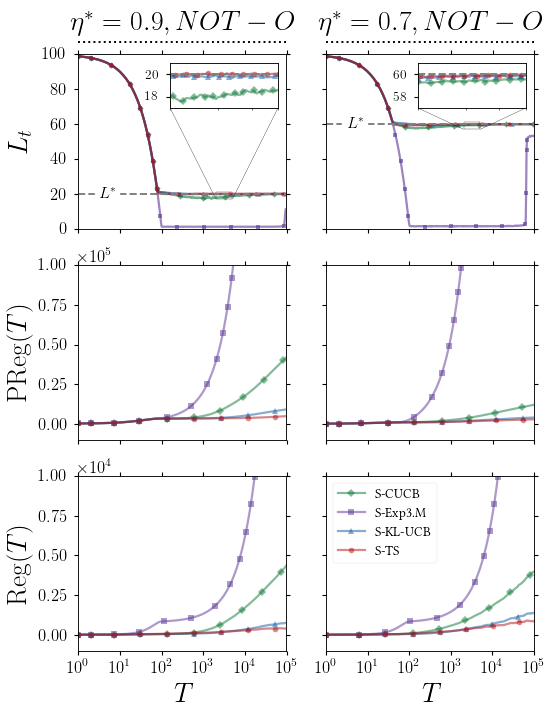

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [32]:
%matplotlib notebook

fig, axes = plt.subplots(3, 2, sharey='row', sharex=True, figsize=(7,9))
axees = axes.flatten()

scalingstrategies = ['KL-1-100-0.9', 'KL-1-100-0.7']
targets = [20,60]
netas = [0.9,0.7]
pullrefs = [np.full(100000,20), np.full(100000,60)]

# top plots
offset = 0

for j,scalingstrategy in enumerate(scalingstrategies):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    subdata = subdata[~subdata["optimistic"]]
    data_grouped = subdata[subdata["scalingstrategy"] == scalingstrategy].groupby("bandit")
    
    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        df = df.sort_values("iteration").reset_index()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        df = df.iloc[[0] + list(indices)]
        name = df['bandit'][0]
        if(name in ["OD", "OR"]):
            pass
        else:
            lw = 2
            df['k'].plot(label=prettynames[name], linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                markevery=0.1, alpha=0.6, markersize=4,# logx=True,
                               marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    plt.axhline(y=targets[j], linestyle="--", c="grey")
    plt.text(5, targets[j], "$L^*$", fontsize=15, va='center', ha='center', backgroundcolor='w')
    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel("$L_t$")
        
    plt.ylim((0,100))
    plt.title(r'$\eta^* = %s, NOT-O$'%(netas[j]), y=1.1)
    plt.axhline(y=107, c="black", linestyle=":", clip_on=False)

    ax = plt.gca()
    from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
    axins = zoomed_inset_axes(ax, 6.5, loc=1)

    for i,df in data_grouped:
        df = df.sort_values("iteration").reset_index()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        df = df.iloc[[0] + list(indices)]
        name = df['bandit'][0]
        if(name in ["OD", "OR"]):
            pass
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                df['k'].plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                df['k'].plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    x1, x2, y1, y2 = 2000, 5000, targets[j]-3, targets[j]+1 # specify the limits
    axins.set_xlim(x1, x2) # apply the x-limits
    axins.set_ylim(y1, y2) # apply the y-limits

    axins.tick_params(axis='x',which='both',labelbottom='off')
    plt.tick_params(axis="both", labelsize=12)

    plt.axhline(y=targets[j], linestyle="--", c="grey")
    plt.yticks([targets[j],targets[j]-2], ["$%s$"%(targets[j]),"$%s$"%(targets[j]-2)])

    from mpl_toolkits.axes_grid1.inset_locator import mark_inset
    mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.1")
    
# middle plots   
offset = 2

for j,scalingstrategy in enumerate(scalingstrategies):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    subdata = subdata[~subdata["optimistic"]]
    data_grouped = subdata[subdata["scalingstrategy"] == scalingstrategy].groupby("bandit")
    
    pullref = pullrefs[j]

    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        ks = df.sort_values("iteration").reset_index().k
        regret = np.abs(pullref - ks)
        cumsum = regret.cumsum()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        cumsum = cumsum.iloc[[0] + list(indices)]
        name = df.iloc[0,0]
        if(name in ["OD", "OR"]):
            pass # do not plot it 
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel("$\mathrm{PReg}(T)$")
        
    plt.ylim((-10000,100000))

    
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
# lower plots 
offset = 4


for j,scalingstrategy in enumerate(scalingstrategies):
    subdata = masterdata[masterdata["bandit"].isin(selected_bandits)]
    subdata = subdata[~subdata["optimistic"]]
    data_grouped = subdata[subdata["scalingstrategy"] == scalingstrategy].groupby("bandit")
    
    plt.sca(axees[j+offset])
    for i,df in data_grouped:
        ks = df.sort_values("iteration").reset_index().k
        gains = df.sort_values("iteration").reset_index().gain
        regret = [expected_gains[int((x-1)*100)]*x for x in ks] - gains
        cumsum = regret.cumsum()
        indices = np.unique([math.floor(np.power(10,x/100)) for x in range(500)])
        cumsum = cumsum.iloc[[0] + list(indices)]
        name = df.iloc[0,0]
        if(name in ["OD", "OR"]):
            pass # do not plot it 
        else:
            lw = 2
            if(styledictionary[name]['linestyle'] == ":"):
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5, dashes=(1,1),
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
            else:
                cumsum.plot(label=prettynames[name],linewidth=lw, logx=True, linestyle=styledictionary[name]['linestyle'],
                                    markevery=0.1, alpha=0.5, markersize=5,
                                   marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])

    plt.tick_params(top=True, right=True)
    
    if(j == 0):
        plt.ylabel(r"$\mathrm{Reg}(T)$")
    else:
        plt.legend(fontsize = 12, ncol=1, loc='best')
        
    plt.ylim((-1000,10000))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
    plt.xlabel("$T$")
    plt.xticks([1,10,100,1000,10000,100000])
    
plt.tight_layout()
plt.savefig("static_experiment_nonopt.pdf")


